In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

/media/wuguo-buaa/LENOVO_USB_HDD/PycharmProjects/Machine_learning_venv/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.18ubuntu0.18.04.1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
filepath = "../Data Preprocessing/iot23_combined.csv"

In [3]:
df = pd.read_csv(filepath)

In [4]:
del df['Unnamed: 0']

In [6]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,category,...,conn_state_SF,conn_state_SH,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,0,Benign,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,0,Benign,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739669,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
2739670,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
2739671,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0
2739672,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,Malware,...,0,0,0,1,0,0,0,0,0,0


In [5]:
XGB = XGBClassifier()
param_dist = {
'n_estimators':range(80,200,20),
# 'max_depth':range(4,10,1),
# 'learning_rate':np.linspace(0.01,2,20),
# 'subsample':np.linspace(0.7,0.9,20),
# 'colsample_bytree':np.linspace(0.5,0.98,10),
'min_child_weight':range(2,5,1)
}


In [6]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'service_-', 'service_dhcp', 'service_dns', 'service_http', 'service_ssh', 'service_ssl', 'service_irc', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']].values
Y = df['label'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)
Y_train, Y_test = Y_train.astype(int), Y_test.astype(int)

In [8]:
type(Y_train)
print(Y_train.size)
Y_train

2191739


array([1, 1, 1, ..., 1, 1, 2])

In [ ]:
start = time.time()
print('program start...')
print()

#GridSearchCV参数说明，clf1设置训练的学习器
#param_dist字典类型，放入参数搜索范围
#scoring = 'neg_log_loss'，精度评价方式设定为“neg_log_loss“
#n_iter=300，训练300次，数值越大，获得的参数精度越大，但是搜索时间越长
#n_jobs = -1，使用所有的CPU进行训练，默认为1，使用1个CPU
grid = GridSearchCV(XGB, param_dist, cv = 3, scoring = 'neg_log_loss', n_jobs = 8)

#在训练集上训练
grid.fit(X_train,np.ravel(Y_train))
#返回最优的训练器
best_estimator = grid.best_estimator_
print(best_estimator)
print(grid.best_score_)
#输出最优训练器的精度
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...



/media/wuguo-buaa/LENOVO_USB_HDD/PycharmProjects/Machine_learning_venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [ ]:
print('Score:')
score = xgb_clasifier.score(X_test,Y_test)
print(score)


In [24]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :


/media/wuguo-buaa/LENOVO_USB_HDD/PycharmProjects/Machine_learning_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      0.54      0.69     75302
           1       0.67      1.00      0.80    311713
           2       0.68      0.00      0.00    104388
           3       0.00      0.00      0.00         1
           4       1.00      0.81      0.89     52594
           5       1.00      0.12      0.21      2969
           6       1.00      1.00      1.00       832
           7       0.90      0.39      0.55       112
           8       0.86      0.80      0.83        15
           9       0.00      0.00      0.00         3
          10       1.00      1.00      1.00         1
          11       0.75      0.75      0.75         4
          12       0.00      0.00      0.00         1

    accuracy                           0.72    547935
   macro avg       0.68      0.49      0.52    547935
weighted avg       0.75      0.72      0.64    547935



/media/wuguo-buaa/LENOVO_USB_HDD/PycharmProjects/Machine_learning_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/wuguo-buaa/LENOVO_USB_HDD/PycharmProjects/Machine_learning_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IndexError: index 12 is out of bounds for axis 1 with size 12

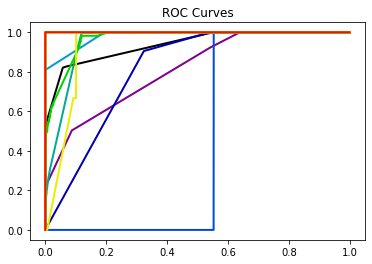

In [25]:
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt
predicted_probas = xgb_clasifier.predict_proba(X_test)
#ROC曲线
skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.savefig('./XGB/PIC/model_multi_classification_roc.jpg')
#P-R曲线
skplt.metrics.plot_precision_recall_curve(Y_test, predicted_probas, cmap='nipy_spectral')
plt.savefig('./XGB/PIC/model_multi_classification_pr.jpg')

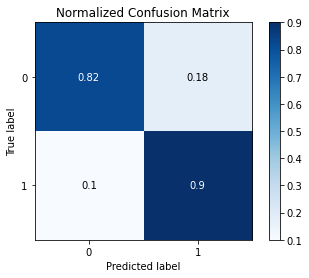

In [48]:
#混淆矩阵
predictions = cross_val_predict(xgb_clasifier, X, Y.astype(int))
plot = skplt.metrics.plot_confusion_matrix(Y.astype(int), predictions, normalize=True)
plt.savefig('./XGB/PIC/model_multi_classification_confusionMatrix.jpg')

In [49]:
import joblib
#lr是一个DT模型
joblib.dump(xgb_clasifier, './XGB/XGB.model')
# DT = joblib.load('dt.model')

['./XGB/XGB.model']